In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import timeit
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb


%matplotlib inline

/Users/rafael/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Import de Datasets
dt_train = pd.read_csv("train.csv")
dt_test = pd.read_csv("test.csv")

In [3]:
display(dt_train.head(n=5))

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
dt_train['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [5]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [6]:
import ast, math

In [7]:
collection = dt_train['belongs_to_collection']

In [8]:
coll_list = []
for item in dt_train['belongs_to_collection']:
    try:
        if math.isnan(item):
            coll_list.append({})
    except:
        coll_list.append(ast.literal_eval(item.replace('[','').replace(']','')))
    

### Budget

In [9]:
budget = pd.DataFrame(dt_train['budget'])

In [10]:
scaler_bu = MinMaxScaler()

In [11]:
budget_sc = pd.DataFrame(scaler_bu.fit_transform(budget)).rename(index=str, columns={0: "budget"})

/Users/rafael/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
budget_sc = budget_sc.reset_index(drop=True)

(array([2.411e+03, 3.630e+02, 1.230e+02, 5.500e+01, 2.000e+01, 1.700e+01,
        7.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

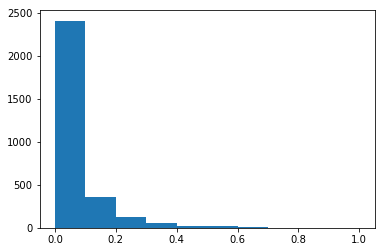

In [13]:
plt.hist(budget_sc['budget'])

### original_language

In [14]:
original_language = dt_train['original_language']

In [15]:
original_language_dummies = pd.get_dummies(original_language)[['en','fr','ru','es','hi']]

### Popularity

In [16]:
popularity = pd.DataFrame(dt_train['popularity'])

In [17]:
scaler_pop = MinMaxScaler()

In [18]:
popularity_sc = pd.DataFrame(scaler_pop.fit_transform(popularity)).rename(index=str, columns={0: "pop"})

### Production companies

In [19]:
companies = dt_train['production_companies']
companies = companies.fillna('')

In [20]:
all_companies = []
for obs in companies:
    if obs!='':
        item = ast.literal_eval(obs.replace('[','').replace(']',''))
        if type(item)==dict:
            all_companies.append(item['name'])
        else:
            for c in item:
                all_companies.append(c['name'])

In [21]:
all_companies_dt = pd.Series(all_companies)

In [22]:
def create_col(name,name_col):
    dt_train[name.lower()] = dt_train[name_col].str.contains(name, regex=False)
    dt_train[name.lower()] = dt_train[name.lower()].apply(lambda x: 1 if x ==True else 0)

In [23]:
for item in all_companies_dt.value_counts().index[0:10]:
    create_col(item,'production_companies')

In [24]:
a=[]
for item in all_companies_dt.value_counts().index[0:10]:
    a.append(item.lower())

### Production countries

In [26]:
countries = dt_train['production_countries']

In [50]:
countries = countries.fillna('')

In [51]:
all_countries = []
for obs in countries:
    if obs!='':
        item = ast.literal_eval(obs.replace('[','').replace(']',''))
        if type(item)==dict:
            all_countries.append(item['name'])
        else:
            for c in item:
                all_countries.append(c['name'])

In [52]:
all_countries_dt = pd.Series(all_countries)

In [53]:
all_countries_dt.value_counts()

United States of America    2282
United Kingdom               380
France                       222
Germany                      167
Canada                       120
India                         81
Italy                         64
Japan                         61
Australia                     61
Russia                        58
Spain                         54
China                         42
Hong Kong                     42
Ireland                       23
Belgium                       23
South Korea                   22
Mexico                        19
Sweden                        18
New Zealand                   17
Netherlands                   15
Czech Republic                14
Denmark                       13
Brazil                        12
Luxembourg                    10
South Africa                  10
United Arab Emirates           9
Hungary                        9
Switzerland                    8
Austria                        8
Romania                        8
          

In [54]:
a=[]
for item in all_countries_dt.value_counts().index[0:6]:
    a.append(item.lower())

In [55]:
a

['united states of america',
 'united kingdom',
 'france',
 'germany',
 'canada',
 'india']

In [56]:
for item in all_countries_dt.value_counts().index[0:6]:
    create_col(item,'production_countries')

### release_date

In [57]:
date = dt_train['release_date']

In [58]:
from datetime import datetime
#dt_train['timestamp'] = datetime.strptime(dt_train['Dates'][0], '%Y-%m-%d %H:%M:%S')
dt_train['timestamp'] = pd.DataFrame(datetime.strptime(x, '%m/%d/%y') for x in dt_train['release_date'])
dt_train['year'] = pd.DataFrame([x.year if x.year<2019 else (x.year-100) for x in dt_train['timestamp']])
dt_train['decade'] = pd.DataFrame(['decade '+str(int(str(x)[-2:])//10*10) for x in dt_train['year']])
dt_train['month'] = pd.DataFrame([('month '+str(x.month)) for x in dt_train['timestamp']])


In [59]:
month_dummies = pd.get_dummies(dt_train['month'])
decade_dummies = pd.get_dummies(dt_train['decade'])

### runtime

In [60]:
runtime = dt_train ['runtime']

In [61]:
run_mean = runtime.mean()

In [62]:
for n in range(len(runtime)):
    if math.isnan(runtime.iloc[n]):
        runtime.iloc[n] = run_mean

/Users/rafael/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [63]:
runtime_dt = pd.DataFrame(runtime)

In [64]:
scaler_run = MinMaxScaler()

In [65]:
runtime_sc = pd.DataFrame(scaler_run.fit_transform(runtime_dt)).rename(index=str, columns={0: "runtime"})

### genres

In [66]:
genres = dt_train['genres']

In [67]:
genres = genres.fillna('')

In [68]:
all_genres = []
for obs in genres:
    if obs!='':
        item = ast.literal_eval(obs.replace('[','').replace(']',''))
        if type(item)==dict:
            all_genres.append(item['name'])
        else:
            for c in item:
                all_genres.append(c['name'])

In [69]:
unique_genres = list(set(all_genres))

##### Tudo isso foi feito para se identificar quais eram todos os gêneros

In [70]:
a=[]
for item in unique_genres:
      a.append(item.lower())

In [71]:
for item in unique_genres:
    create_col(item,'genres')

### spoken_languages

In [72]:
spoken_languages = dt_train['spoken_languages']

In [73]:
spoken_languages = spoken_languages.fillna('')

In [74]:
lang_counts = []
for obs in spoken_languages:
    if obs!='':
        item = ast.literal_eval(obs.replace('[','').replace(']',''))
        if type(item)==dict:
            lang_counts.append('L1')
        else:
            lang_counts.append('L2+')
    else:
        lang_counts.append('L1')

In [75]:
lang_counts_dt = pd.DataFrame(lang_counts)

In [76]:
lang_counts_dummies = pd.get_dummies(lang_counts_dt)

### cast

In [77]:
cast = dt_train['cast']
cast = cast.fillna('')

#### IDEIA: VERIFICAR QUANTAS MULHERES E HOMENS POR FILME

In [78]:
first_gender = []
n_actors = []
#n=0
for obs in cast:
    if obs!='' and obs!='[]':
        item = ast.literal_eval(obs.replace('[','').replace(']',''))
        if type(item)==dict:
            first_gender.append('gender '+ str(item['gender']))
            n_actors.append(1)
        else:
            first_gender.append('gender '+ str(item[0]['gender']))
            n_actors.append(len(item))
    else:
        first_gender.append('no_actors')
        n_actors.append(0)

In [79]:
first_gender_dt = pd.DataFrame(first_gender).rename(index=str, columns={0: "first_gender"})
first_gender_dummies = pd.get_dummies(first_gender)
n_act_scaler = MinMaxScaler()
n_actors_sc = pd.DataFrame(n_act_scaler.fit_transform(pd.DataFrame(n_actors))).rename(index=str, columns={0: "n_actors"})


/Users/rafael/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Actors

In [80]:
act_list = ['tom hanks',
'christian bale',
'leonardo dicaprio', 
'morgan freeman',
'robert de niro',
'anthony hopkins',
'denzel washington',
'robert downey jr',
'kevin spacey',
'johnny depp',
'gary oldman',
'daniel day-lewis',
'edward norton',
'al pacino',
'liam neeson',
'matt damon',
'brad pitt',
'hugh jackman',
'jack nicholson',
'marlon brando',
'clint eastwood',
'harrison ford',
'robin williams',
'mel gibson',
'john travolta','meryl streep','andy serkis', 'jodie foster', 'jennifer lawrence']

In [81]:
def create_col_lowercase(name,name_col):
    dt_train[name.lower()] = dt_train[name_col].str.lower().str.contains(name, regex=False)
    dt_train[name.lower()] = dt_train[name.lower()].apply(lambda x: 1 if x ==True else 0)

for item in act_list:
    create_col_lowercase(item, 'cast')

# features

In [82]:
def index_reset(dataset):
    dataset.reset_index(drop=True, inplace=True)

In [83]:
c = [budget_sc,popularity_sc,month_dummies,decade_dummies,runtime_sc,original_language_dummies,lang_counts_dummies,n_actors_sc]

In [84]:
for item in c:
    index_reset(item)

In [85]:
features = pd.concat([budget_sc,
                      popularity_sc,
                      month_dummies,
                      decade_dummies,
                      runtime_sc,
                      original_language_dummies,
                      lang_counts_dummies,
                      n_actors_sc,
                      dt_train[['fantasy',
                                'crime',
                                'history',
                                'science fiction',
                                'action',
                                'tv movie',
                                'music',
                                'western',
                                'family',
                                'documentary',
                                'mystery',
                                'thriller',
                                'horror',
                                'adventure',
                                'foreign',
                                'romance',
                                'animation',
                                'war',
                                'drama',
                                'comedy','warner bros.',
                                'universal pictures',
                                'paramount pictures',
                                'twentieth century fox film corporation',
                                'columbia pictures',
                                'metro-goldwyn-mayer (mgm)',
                                'new line cinema',
                                'touchstone pictures',
                                'walt disney pictures',
                                'columbia pictures corporation',
                                'united states of america',
                                'united kingdom',
                                'france',
                                'germany',
                                'canada',
                                'india','tom hanks',
                                'christian bale',
                                'leonardo dicaprio', 
                                'morgan freeman',
                                'robert de niro',
                                'anthony hopkins',
                                'denzel washington',
                                'robert downey jr',
                                'kevin spacey',
                                'johnny depp',
                                'gary oldman',
                                'daniel day-lewis',
                                'edward norton',
                                'al pacino',
                                'liam neeson',
                                'matt damon',
                                'brad pitt',
                                'hugh jackman',
                                'jack nicholson',
                                'marlon brando',
                                'clint eastwood',
                                'harrison ford',
                                'robin williams',
                                'mel gibson',
                                'john travolta',
                                'meryl streep',
                                'andy serkis', 
                                'jodie foster',
                                'jennifer lawrence']]],axis=1)
                      

In [257]:
features = pd.concat([budget_sc,
                      popularity_sc,
                      month_dummies,
                      decade_dummies,
                      runtime_sc,
                      original_language_dummies,
                      lang_counts_dummies,
                      n_actors_sc,
                      dt_train[['fantasy',
                                'crime',
                                'history',
                                'science fiction',
                                'action',
                                'tv movie',
                                'music',
                                'western',
                                'family',
                                'documentary',
                                'mystery',
                                'thriller',
                                'horror',
                                'adventure',
                                'foreign',
                                'romance',
                                'animation',
                                'war',
                                'drama',
                                'comedy','warner bros.',
                                'universal pictures',
                                'paramount pictures',
                                'twentieth century fox film corporation',
                                'columbia pictures',
                                'metro-goldwyn-mayer (mgm)',
                                'new line cinema',
                                'touchstone pictures',
                                'walt disney pictures',
                                'columbia pictures corporation',
                                'united states of america',
                                'united kingdom',
                                'france',
                                'germany',
                                'canada',
                                'india',
                                'tom hanks',
                                'christian bale',
                                'leonardo dicaprio', 
                                'morgan freeman',
                                'robert de niro',
                                'anthony hopkins',
                                'denzel washington',
                                'robert downey jr',
                                'kevin spacey',
                                'johnny depp',
                                'gary oldman',
                                'daniel day-lewis',
                                'edward norton',
                                'al pacino',
                                'liam neeson',
                                'matt damon',
                                'brad pitt',
                                'hugh jackman',
                                'jack nicholson',
                                'marlon brando',
                                'clint eastwood',
                                'harrison ford',
                                'robin williams',
                                'mel gibson',
                                'john travolta',
                                'meryl streep',
                                'andy serkis', 
                                'jodie foster', 
                                'jennifer lawrence']]],axis=1)

In [86]:
features_fds = pd.concat([budget_sc,
                      popularity_sc,
                      month_dummies,
                      decade_dummies,
                      runtime_sc,
                      original_language_dummies,
                      lang_counts_dummies,
                      n_actors_sc,
                      dt_train[['fantasy',
                                'crime',
                                'history',
                                'science fiction',
                                'action',
                                'tv movie',
                                'music',
                                'western',
                                'family',
                                'documentary',
                                'mystery',
                                'thriller',
                                'horror',
                                'adventure',
                                'romance',
                                'animation',
                                'war',
                                'drama',
                                'comedy',
                                'warner bros.',
                                'universal pictures',
                                'paramount pictures',
                                'twentieth century fox film corporation',
                                'columbia pictures',
                                'metro-goldwyn-mayer (mgm)',
                                'new line cinema',
                                'touchstone pictures',
                                'walt disney pictures',
                                'columbia pictures corporation',
                                'united states of america',
                                'united kingdom',
                                'france',
                                'india',
                                'tom hanks',
                                'christian bale',
                                'leonardo dicaprio', 
                                'morgan freeman',
                                'robert de niro',
                                'denzel washington',
                                'robert downey jr',
                                'kevin spacey',
                                'johnny depp',
                                'gary oldman',
                                'daniel day-lewis',
                                'al pacino',
                                'liam neeson',
                                'matt damon',
                                'brad pitt',
                                'hugh jackman',
                                'jack nicholson',
                                'marlon brando',
                                'clint eastwood',
                                'harrison ford',
                                'robin williams',
                                'mel gibson',
                                'john travolta',
                                'meryl streep',
                                'andy serkis' ]]],axis=1)
                      

### Revenue

In [87]:
revenue = pd.DataFrame(dt_train['revenue'])

In [88]:
revenue.reset_index(drop=True, inplace=True)
revenue.rename(index=str, columns={0: "revenue"},inplace=True)

### Seleção de features

In [258]:
correlations = pd.concat([features.reset_index(drop=True),revenue.reset_index(drop=True)],axis=1).corr()

In [259]:
corr_rev = correlations.sort_values(by='revenue',ascending=False)['revenue']
corr_rev = corr_rev[corr_rev<1]

corr_p = corr_rev[(corr_rev>0)]
corr_p = corr_p[corr_p<1]

features_ord = list(corr_rev.index)
features_best = list(corr_p.index)

In [260]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=35)
fit = bestfeatures.fit(features,revenue)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(35,'Score'))  #print 10 best features


In [261]:
features_best3=list(featureScores.sort_values(by='Score')['Specs'][:60])

In [262]:
corr_rev2 = abs(correlations).sort_values(by='revenue',ascending=False)['revenue']

corr_p2 = corr_rev[corr_rev>0.04]
features_best2 = list(corr_p2.index)

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## TRAIN TEST SPLIT

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
# Shuffle e Split da base sem PCA
X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
                                                    np.log(revenue['revenue']), 
                                                    test_size = 0.2, 
                                                    random_state = 19, 
                                                    shuffle=True)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2400 samples.
Testing set has 600 samples.


## REGRESSORS

In [1846]:
calc_RMSD(reg10, X_train, y_train, X_test, y_test)

(0.8571246140967187, 1.9910362458035005)

In [1758]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

reg1 = LinearRegression()
reg2 = LinearRegression(n_jobs=10)
reg3 = SVR()
reg4 = SVR(C=10)
reg5 = SVR(kernel='poly')
reg6 = AdaBoostRegressor(random_state=19)
reg7 = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)
reg8 = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=20),random_state=19)
reg9 = AdaBoostRegressor(n_estimators = 200,base_estimator = DecisionTreeRegressor(max_depth=20),random_state=19)
reg10 = AdaBoostRegressor(n_estimators = 200,base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)
reg11 = AdaBoostRegressor(n_estimators = 100,base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)
reg12 = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(min_samples_split=10,max_depth=10),random_state=19)
reg13 = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(min_samples_split=9,max_depth=10),random_state=19)

reg14 = RandomForestRegressor(random_state=19)
reg15 = RandomForestRegressor(random_state=19, max_depth = 5)
reg16 = RandomForestRegressor(random_state=19, max_depth = 10, min_samples_split = 15)
reg17 = RandomForestRegressor(random_state=19, max_depth = 6, max_features=5)

reg10b = AdaBoostRegressor(n_estimators = 200, loss='exponential',base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)
reg10c = AdaBoostRegressor(n_estimators = 300,base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)
reg10d = AdaBoostRegressor(n_estimators = 150,base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)
reg10e = AdaBoostRegressor(n_estimators = 180,base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)
reg10f = AdaBoostRegressor(n_estimators = 220,base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)
reg10g = AdaBoostRegressor(n_estimators = 230,base_estimator = DecisionTreeRegressor(max_depth=10),random_state=19)

reg18 = GradientBoostingRegressor(random_state=19)
reg19 = GradientBoostingRegressor(random_state=19,learning_rate=.5)
reg20 = GradientBoostingRegressor(random_state=19,learning_rate=.1)
reg21= GradientBoostingRegressor(random_state=19,max_depth=10)
reg22 = GradientBoostingRegressor(random_state=19,max_depth=5)
reg23 = GradientBoostingRegressor(random_state=19, )


In [893]:
def RMSD(y_actual, y_pred):
    dif2=0
    for n in range(len(y_actual)):
        dif2 = dif2+ (y_actual.iloc[n]-y_pred[n])**2
    r = (dif2/len(y_actual))**(1/2)
    return r
        

In [894]:
def calc_RMSD(reg, xtrain, ytrain,xtest,ytest):
    reg.fit(xtrain,ytrain)
    ypred_test = reg.predict(xtest)
    ypred_train = reg.predict(xtrain)
    rmsd_test = RMSD(ytest,ypred_test)
    rmsd_train=RMSD(ytrain,ypred_train)
    return rmsd_train,rmsd_test
    print('Train RMSD: {} /n Test RMSD: {}'.format(rmsd_train, rmsd_test))


In [1847]:
calc_RMSD(reg1, X_train, y_train, X_test, y_test)

(2.4390918754731485, 2.2925108479566805)

In [1848]:
calc_RMSD(reg2, X_train, y_train, X_test, y_test)

(2.4390918754731485, 2.2925108479566805)

In [1849]:
calc_RMSD(reg3, X_train, y_train, X_test, y_test)

/Users/rafael/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(2.7380394561556627, 2.5338867559856375)

In [1850]:
calc_RMSD(reg4, X_train, y_train, X_test, y_test)

/Users/rafael/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(2.5051932768802136, 2.3302978947387203)

In [1851]:
calc_RMSD(reg5, X_train, y_train, X_test, y_test)

/Users/rafael/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(3.1532734828570357, 2.9708068665036165)

In [1852]:
calc_RMSD(reg6, X_train, y_train, X_test, y_test)

(2.5609165698866203, 2.503722415034288)

In [1853]:
calc_RMSD(reg7, X_train, y_train, X_test, y_test)

(0.8860071243496803, 2.0019536508948566)

In [1854]:
calc_RMSD(reg8, X_train, y_train, X_test, y_test)

(0.19953686349371216, 2.119650873628935)

In [1855]:
calc_RMSD(reg9, X_train, y_train, X_test, y_test)

(0.18452457654498985, 2.0679547301294767)

In [1856]:
calc_RMSD(reg10, X_train, y_train, X_test, y_test)

(0.8571246140967187, 1.9910362458035005)

In [1857]:
calc_RMSD(reg11, X_train, y_train, X_test, y_test)

(0.8731725252599343, 2.0020013170228514)

In [1858]:
calc_RMSD(reg12, X_train, y_train, X_test, y_test)

(1.0188281810222921, 2.045496094827058)

In [1859]:
calc_RMSD(reg13, X_train, y_train, X_test, y_test)

(0.9849473169241314, 1.9772971012395641)

In [1860]:
calc_RMSD(reg10, X_train, y_train, X_test, y_test)

(0.8571246140967187, 1.9910362458035005)

In [1861]:
calc_RMSD(reg10c, X_train, y_train, X_test, y_test)

(0.8516102657419777, 1.979822831677371)

In [1862]:
calc_RMSD(reg10d, X_train, y_train, X_test, y_test)

(0.8650656109584204, 1.9963558954674248)

In [1863]:
calc_RMSD(reg10e, X_train, y_train, X_test, y_test)

(0.8633527694032058, 1.9918568777371426)

In [1864]:
calc_RMSD(reg10f, X_train, y_train, X_test, y_test)

(0.8566831591881805, 1.9848679869216808)

In [1865]:
calc_RMSD(reg18, X_train, y_train, X_test, y_test)

(1.862859322293951, 2.0073457975824045)

In [1866]:
calc_RMSD(reg19, X_train, y_train, X_test, y_test)

(1.3025288812920663, 2.2068759491946204)

In [1867]:
calc_RMSD(reg20, X_train, y_train, X_test, y_test)

(1.862859322293951, 2.0073457975824045)

In [1868]:
calc_RMSD(reg21, X_train, y_train, X_test, y_test)

(0.18186291087989723, 2.3621305703462516)

In [1869]:
calc_RMSD(reg22, X_train, y_train, X_test, y_test)

(1.3174029807366272, 2.10872730897808)

In [1870]:
calc_RMSD(reg23, X_train, y_train, X_test, y_test)

(1.862859322293951, 2.0073457975824045)

### GridSearch

In [ ]:
def RMSD_grid(y_actual, y_pred):
    dif2=0
    for n in range(len(y_actual)):
        dif2 = dif2+ (y_actual.iloc[n]-y_pred[n])**2
    r = (dif2/len(y_actual))**(1/2)
    return r
        

In [1010]:
from sklearn.model_selection import GridSearchCV 
from  sklearn.metrics import make_scorer

# TODO: Initialize the classifier
reg = AdaBoostRegressor(random_state=19)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
p_list = ['n_estimators','base_estimator','learning_rate']

# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[10,50,100,150,200,250],
              'learning_rate':[0.1,0.2,0.5,0.7,0.8,1],
              'base_estimator':[DecisionTreeRegressor(max_depth=20),
                                DecisionTreeRegressor(max_depth=15),
                                DecisionTreeRegressor(max_depth=10),
                                DecisionTreeRegressor(max_depth=8),
                                DecisionTreeRegressor(max_depth=5),
                                DecisionTreeRegressor(max_depth=3)]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(RMSD, greater_is_better=False)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(reg, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_reg = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (reg.fit(X_train, y_train)).predict(X_test)
best_predictions = best_reg.predict(X_test)



/Users/rafael/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [1012]:
calc_RMSD(best_reg, X_train, y_train, X_test, y_test)

(0.8778602502032161, 1.9717782005429023)

# TEST DATA
# TEST DATA
# TEST DATA
# TEST DATA
# TEST DATA
# TEST DATA

In [97]:
dt_test = pd.read_csv("test.csv")

In [98]:
def create_col_test(name,name_col):
    dt_test[name.lower()] = dt_test[name_col].str.contains(name, regex=False)
    dt_test[name.lower()] = dt_test[name.lower()].apply(lambda x: 1 if x ==True else 0)

In [99]:
budget_test = pd.DataFrame(dt_test['budget'])
budget_sc_test = pd.DataFrame(scaler_bu.transform(budget_test)).rename(index=str, columns={0: "budget"})

In [100]:
original_language_test = dt_test['original_language']
original_language_dummies_test = pd.get_dummies(original_language_test)[['en','fr','ru','es','hi']]


In [101]:
popularity_test = pd.DataFrame(dt_test['popularity'])
popularity_sc_test = pd.DataFrame(scaler_pop.transform(popularity_test)).rename(index=str, columns={0: "pop"})

In [102]:
# companies = dt_test['production_companies']
# companies = companies.fillna('')

# all_companies = []
# for obs in companies:
#     if obs!='':
#         item = ast.literal_eval(obs.replace('[','').replace(']',''))
#         if type(item)==dict:
#             all_companies.append(item['name'])
#         else:
#             for c in item:
#                 all_companies.append(c['name'])

# all_companies_dt = pd.Series(all_companies)

# for item in all_companies_dt.value_counts().index[0:10]:
#     create_col_test(item,'production_companies')
    
# a=[]
# for item in all_companies_dt.value_counts().index[0:10]:
#     a.append(item.lower())

l = ['warner bros.',
 'universal pictures',
 'paramount pictures',
 'twentieth century fox film corporation',
 'columbia pictures',
 'metro-goldwyn-mayer (mgm)',
 'new line cinema',
 'touchstone pictures',
 'walt disney pictures',
 'columbia pictures corporation']

for item in l:
    create_col_test(item,'production_companies')

In [103]:
# countries = dt_test['production_countries']
# countries = production_countries.fillna('')

# all_countries = []
# for obs in countries:
#     if obs!='':
#         item = ast.literal_eval(obs.replace('[','').replace(']',''))
#         if type(item)==dict:
#             all_countries.append(item['name'])
#         else:
#             for c in item:
#                 all_countries.append(c['name'])

# all_countries_dt = pd.Series(all_countries)

# b=[]
# for item in all_countries_dt.value_counts().index[0:6]:
#     b.append(item.lower())

l = ['united states of america',
 'united kingdom',
 'france',
 'germany',
 'canada',
 'india']

for item in l:
    create_col_test(item,'production_countries')


In [104]:
date_test = dt_test['release_date']
date_test[828]='5/10/00'
from datetime import datetime

dt_test['timestamp'] = pd.DataFrame(datetime.strptime(x, '%m/%d/%y') for x in dt_test['release_date'])
dt_test['year'] = pd.DataFrame([x.year if x.year<2019 else (x.year-100) for x in dt_test['timestamp']])
dt_test['decade'] = pd.DataFrame(['decade '+str(int(str(x)[-2:])//10*10) for x in dt_test['year']])
dt_test['month'] = pd.DataFrame([('month '+str(x.month)) for x in dt_test['timestamp']])

month_dummies_test = pd.get_dummies(dt_test['month'])
decade_dummies_test = pd.get_dummies(dt_test['decade'])

/Users/rafael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [105]:
runtime_test = dt_test['runtime']

for n in range(len(runtime_test)):
    if math.isnan(runtime_test.iloc[n]):
        runtime_test.iloc[n] = run_mean

runtime_dt_test = pd.DataFrame(runtime_test)
runtime_sc_test = pd.DataFrame(scaler_run.transform(runtime_dt_test)).rename(index=str, columns={0: "runtime"})

/Users/rafael/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [106]:
genres_test = dt_test['genres']
genres_test = genres_test.fillna('')

for item in unique_genres:
    create_col_test(item,'genres')

In [107]:
spoken_languages_test = dt_test['spoken_languages']
spoken_languages_test = spoken_languages_test.fillna('')

lang_counts_test = []
for obs in spoken_languages_test:
    if obs!='':
        item = ast.literal_eval(obs.replace('[','').replace(']',''))
        if type(item)==dict:
            lang_counts_test.append('L1')
        else:
            lang_counts_test.append('L2+')
    else:
        lang_counts_test.append('L1')

lang_counts_dt_test = pd.DataFrame(lang_counts_test)
lang_counts_dummies_test = pd.get_dummies(lang_counts_dt_test)

In [108]:
cast_test = dt_test['cast']
cast_test = cast_test.fillna('')

first_gender_test = []
n_actors_test = []
#n=0
for obs in cast_test:
    if obs!='' and obs!='[]':
        item = ast.literal_eval(obs.replace('[','').replace(']',''))
        if type(item)==dict:
            first_gender_test.append('gender '+ str(item['gender']))
            n_actors_test.append(1)
        else:
            first_gender_test.append('gender '+ str(item[0]['gender']))
            n_actors_test.append(len(item))
    else:
        first_gender_test.append('no_actors')
        n_actors_test.append(0)

first_gender_dt_test = pd.DataFrame(first_gender_test).rename(index=str, columns={0: "first_gender"})
first_gender_dummies_test = pd.get_dummies(first_gender_test)
n_actors_sc_test = pd.DataFrame(n_act_scaler.transform(pd.DataFrame(n_actors_test))).rename(index=str, columns={0: "n_actors"})


In [109]:
c = [budget_sc_test,
     popularity_sc_test,
     month_dummies_test,
     decade_dummies_test,
     runtime_sc_test,
     original_language_dummies_test,
     lang_counts_dummies_test,
     n_actors_sc_test]
for item in c:
    index_reset(item)

In [110]:
def create_col_lowercase_test(name,name_col):
    dt_test[name.lower()] = dt_test[name_col].str.lower().str.contains(name, regex=False)
    dt_test[name.lower()] = dt_test[name.lower()].apply(lambda x: 1 if x ==True else 0)

for item in act_list:
    create_col_lowercase_test(item, 'cast')

In [255]:
features_test = pd.concat([budget_sc_test,
                      popularity_sc_test,
                      month_dummies_test,
                      decade_dummies_test,
                      runtime_sc_test,
                      original_language_dummies_test,
                      lang_counts_dummies_test,
                      n_actors_sc_test,
                      dt_test[['fantasy',
                                'crime',
                                'history',
                                'science fiction',
                                'action',
                                'tv movie',
                                'music',
                                'western',
                                'family',
                                'documentary',
                                'mystery',
                                'thriller',
                                'horror',
                                'adventure',
                                'foreign',
                                'romance',
                                'animation',
                                'war',
                                'drama',
                                'comedy','warner bros.',
                                'universal pictures',
                                'paramount pictures',
                                'twentieth century fox film corporation',
                                'columbia pictures',
                                'metro-goldwyn-mayer (mgm)',
                                'new line cinema',
                                'touchstone pictures',
                                'walt disney pictures',
                                'columbia pictures corporation',
                                'united states of america',
                                'united kingdom',
                                'france',
                                'germany',
                                'canada',
                                'india',
                                'tom hanks',
                                'christian bale',
                                'leonardo dicaprio', 
                                'morgan freeman',
                                'robert de niro',
                                'anthony hopkins',
                                'denzel washington',
                                'robert downey jr',
                                'kevin spacey',
                                'johnny depp',
                                'gary oldman',
                                'daniel day-lewis',
                                'edward norton',
                                'al pacino',
                                'liam neeson',
                                'matt damon',
                                'brad pitt',
                                'hugh jackman',
                                'jack nicholson',
                                'marlon brando',
                                'clint eastwood',
                                'harrison ford',
                                'robin williams',
                                'mel gibson',
                                'john travolta',
                                'meryl streep',
                                'andy serkis', 
                                'jodie foster', 
                                'jennifer lawrence']]],axis=1)

In [112]:
y_pred_test = reg10.predict(features_test)

NameError: name 'reg10' is not defined

In [ ]:
y_pred_f = []
for item in y_pred_test:
    y_pred_f.append(math.exp(item))

In [ ]:
y_pred_test_dt = pd.DataFrame(y_pred_f).rename(index=str, columns={0: "revenue"})
y_pred_test_dt.reset_index(drop=True,inplace=True)

In [226]:
id_ = pd.DataFrame(dt_test['id'])

In [227]:
id_.reset_index(drop=True,inplace=True)

In [ ]:
pred_final = pd.DataFrame(pd.concat([id_,y_pred_test_dt],axis=1))

In [ ]:
pred_final.to_csv('pred.csv',index=False)

### XGBOST TEST

In [302]:
features_best0=list(featureScores.sort_values(by='Score')['Specs'][:60])

In [318]:
from sklearn.model_selection import KFold

train = pd.concat([features[features_best0].reset_index(drop=True), revenue.reset_index(drop=True)],axis=1)

random_seed = 314
k = 5
fold = KFold(k, shuffle = True, random_state = random_seed).split(train)
np.random.seed(random_seed)

In [319]:
fold_list = list(fold)

In [320]:
train_list = []
test_list = []
for n in range(len(fold_list)):
    fold_n = fold_list[n]
    fold_train = fold_n[0]
    fold_test = fold_n[1]
    train_list.append(fold_train)
    test_list.append(fold_test)

In [321]:
len(train_list)

5

In [322]:
params = {'objective': 'reg:linear', 
           'eta': 0.01, 
          'max_depth': 6, 
          'subsample': 0.7, 
          'colsample_bytree': 0.9,  
          'eval_metric': 'rmse', 
          'seed': 5, 
          'silent': True}

def fit_xgb_kfold(kfold_list, features_, revenue_train, features_pred, xgb_params):
    train_list=[]
    test_list=[]
    # cria lista de indexes dos subsets de treino e validação
    for n in range(len(kfold_list)):
        fold_n = fold_list[n]
        fold_train = fold_n[0]
        fold_test = fold_n[1]
        train_list.append(fold_train)
        test_list.append(fold_test)
    
    # split para cada um dos Kfolds
    pred_list = []
    for n in range(len(train_list)):
        X_train_kfold = features_.loc[train_list[n],:]
        X_test_kfold = features_.loc[test_list[n],:]
        y_train_kfold = np.log(revenue['revenue'].iloc[train_list[n]])
        y_test_kfold = np.log(revenue['revenue'].iloc[test_list[n]])
        
        # sets para xgb
        xgbset = [(xgb.DMatrix(X_train_kfold, y_train_kfold), 'train'), (xgb.DMatrix(X_test_kfold, y_test_kfold), 'valid')]
        # modelo xgb
        model = xgb.train(xgb_params, xgb.DMatrix(X_train_kfold, y_train_kfold), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
        
        # predição de saída
        pred = np.expm1(model.predict(xgb.DMatrix(features_pred), ntree_limit=model.best_ntree_limit))
        
        # lista de predições
        pred_list.append(pred)
    
    # média dos valores previstos
    pred_sum = pred_list[0]*0
    for n in range(len(pred_list)):
        pred_sum += pred_list[n]
    
    # predição final
    pred_final = pred_sum/len(pred_list)
    
    return pred_final

In [323]:
pred_final = fit_xgb_kfold(fold_list, 
                           features[features_best0], 
                           revenue, 
                           features_test[features_best0],  
                           params)

[0]	train-rmse:15.6288	valid-rmse:15.5264
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[100]	train-rmse:6.06405	valid-rmse:6.11464
[200]	train-rmse:2.80473	valid-rmse:3.08175
[300]	train-rmse:1.85954	valid-rmse:2.33899
[400]	train-rmse:1.58991	valid-rmse:2.1878
[500]	train-rmse:1.4744	valid-rmse:2.15624
[600]	train-rmse:1.38593	valid-rmse:2.14815
[700]	train-rmse:1.30791	valid-rmse:2.14323
[800]	train-rmse:1.2379	valid-rmse:2.14672
Stopping. Best iteration:
[690]	train-rmse:1.31523	valid-rmse:2.14219

[0]	train-rmse:15.6059	valid-rmse:15.6201
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[100]	train-rmse:6.04274	valid-rmse:6.12695
[200]	train-rmse:2.75521	valid-rmse:3.08997
[300]	train-rmse:1.79427	valid-rmse:2.39271
[400]	train-rmse:1.52911	valid-rmse:2.28292
[500]	train-rmse:1.42249	val

In [309]:
pred_final

array([ 5700326.5,  1243233.9,  5438152.5, ..., 35154024. ,  3497775.2,
        1034939. ], dtype=float32)

In [310]:
id_ = pd.DataFrame(dt_test['id'])
id_.reset_index(drop=True,inplace=True)

pred_xgb_dt = pd.DataFrame(pred_final)
pred_xgb_dt.reset_index(drop=True,inplace=True)
pred_xgb_dt = pd.DataFrame(pd.concat([id_,pred_xgb_dt],axis=1))
pred_xgb_dt.rename(index=str, columns={0: "revenue"},inplace=True)


In [311]:
pred_xgb_dt.to_csv('pred_xgb8.csv',index=False)

In [ ]:
# params = {'objective': 'reg:linear', 
#            'eta': 0.01, 
#           'max_depth': 6, 
#           'subsample': 0.7, 
#           'colsample_bytree': 0.6,  
#           'eval_metric': 'rmse', 
#           'seed': 5, 
#           'silent': True}

# X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
#                                                     np.log(revenue['revenue']), 
#                                                     test_size = 0.1, 
#                                                     random_state = 19, 
#                                                     shuffle=True)

# xgbset = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
# model = xgb.train(params, xgb.DMatrix(X_train, y_train), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
# pred_1 = np.expm1(model.predict(xgb.DMatrix(features_test_xgb), ntree_limit=model.best_ntree_limit))


# X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
#                                                     np.log(revenue['revenue']), 
#                                                     test_size = 0.1, 
#                                                     random_state = 191, 
#                                                     shuffle=True)

# xgbset = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
# model = xgb.train(params, xgb.DMatrix(X_train, y_train), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
# pred_2 = np.expm1(model.predict(xgb.DMatrix(features_test_xgb), ntree_limit=model.best_ntree_limit))

# X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
#                                                     np.log(revenue['revenue']), 
#                                                     test_size = 0.1, 
#                                                     random_state = 91, 
#                                                     shuffle=True)

# xgbset = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
# model = xgb.train(params, xgb.DMatrix(X_train, y_train), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
# pred_3 = np.expm1(model.predict(xgb.DMatrix(features_test_xgb), ntree_limit=model.best_ntree_limit))

# X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
#                                                     np.log(revenue['revenue']), 
#                                                     test_size = 0.1, 
#                                                     random_state = 1, 
#                                                     shuffle=True)

# xgbset = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
# model = xgb.train(params, xgb.DMatrix(X_train, y_train), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
# pred_4 = np.expm1(model.predict(xgb.DMatrix(features_test_xgb), ntree_limit=model.best_ntree_limit))

# X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
#                                                     np.log(revenue['revenue']), 
#                                                     test_size = 0.1, 
#                                                     random_state = 10, 
#                                                     shuffle=True)

# xgbset = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
# model = xgb.train(params, xgb.DMatrix(X_train, y_train), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
# pred_5 = np.expm1(model.predict(xgb.DMatrix(features_test_xgb), ntree_limit=model.best_ntree_limit))

# X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
#                                                     np.log(revenue['revenue']), 
#                                                     test_size = 0.1, 
#                                                     random_state = 11, 
#                                                     shuffle=True)

# xgbset = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
# model = xgb.train(params, xgb.DMatrix(X_train, y_train), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
# pred_6 = np.expm1(model.predict(xgb.DMatrix(features_test_xgb), ntree_limit=model.best_ntree_limit))

# X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
#                                                     np.log(revenue['revenue']), 
#                                                     test_size = 0.1, 
#                                                     random_state = 121, 
#                                                     shuffle=True)

# xgbset = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
# model = xgb.train(params, xgb.DMatrix(X_train, y_train), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
# pred_7 = np.expm1(model.predict(xgb.DMatrix(features_test_xgb), ntree_limit=model.best_ntree_limit))

# X_train, X_test, y_train, y_test = train_test_split(features[features_best3], 
#                                                     np.log(revenue['revenue']), 
#                                                     test_size = 0.1, 
#                                                     random_state = 123, 
#                                                     shuffle=True)

# xgbset = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]
# model = xgb.train(params, xgb.DMatrix(X_train, y_train), 2500,  xgbset, verbose_eval=100, early_stopping_rounds=200)
# pred_8 = np.expm1(model.predict(xgb.DMatrix(features_test_xgb), ntree_limit=model.best_ntree_limit))